In [1]:
import dotspy as ds
print(ds.__file__)

/Users/chunweiy/project/dotspy/dotspy/__init__.py


# Basic graph

## Graph as singlegon

In [2]:
g = ds.Graph(label="quickstart for dotspy", graph_type="digraph")

In [3]:
ds.set_graph(g) # reset global Graph

In [4]:
node0 = ds.Node(labe="node0", color="red")

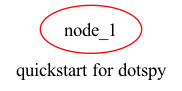

In [5]:
g

## Nested Graph powered by `with`-statement

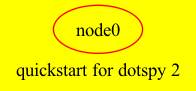

In [6]:
with ds.Graph(label="quickstart for dotspy 2", bgcolor=ds.YELLOW) as g:
    node0 = ds.Node(label="node0", color="red")
g

In [19]:
with ds.Graph(label="quickstart for dotspy 3", bgcolor=ds.YELLOW) as g:
    with ds.Subgraph(label="subgraph 0", bgcolor=ds.BLUE, fontcolor=ds.WHITE):
        node0 = ds.Node(label="node0", bgcolor=ds.WHITE, fontcolor=ds.BLACK, style="filled,rounded")
        with ds.Subgraph(label="subgraph 1", bgcolor=ds.GREEN):
            node1 = ds.Node(label="node1", color=ds.ORANGE, style="filled,rounded", shape="box")

print(g.to_dot())

digraph "G" {
  bgcolor="yellow";
  label="quickstart for dotspy 3";
  rankdir="TB";
  subgraph "cluster_subgraph_0b77baf6f69a47f29d8132cd1e98d45e" {
    fontcolor="white";
    bgcolor="blue";
    label="subgraph 0";
    "node_17" [fontcolor="black", bgcolor="white", label="node0", style="filled,rounded"];
    subgraph "cluster_subgraph_008b939652ea45cd85f76da35097110b" {
      bgcolor="green";
      label="subgraph 1";
      "node_18" [color="orange", label="node1", shape="box", style="filled,rounded"];
    }
  }
}


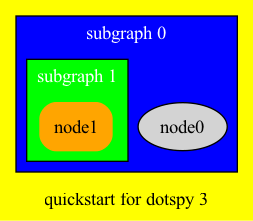

In [20]:
g

# CSS like styling
You can define your own style for graphs, nodes, and edges.

## Define Graph, Node, Edge Style with `NodeStyle`, `EdgeStyle`, `GraphStyle`

digraph "G" {
  label="quickstart for dotspy 4";
  rankdir="TB";
  "node_21" [penwidth="2.0", color="blue", fillcolor="red", label="node0", shape="box", style="filled,rounded"];
  "node_22" [penwidth="2.0", color="orange", fillcolor="red", label="node1", shape="box", style="filled,rounded"];
  "node_21" -> "node_22";
}


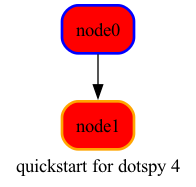

In [22]:
from dotspy import NodeStyle, EdgeStyle, GraphStyle

node_style = NodeStyle(
    fillcolor="red",
    # fill_opacity=0.5,
    color="blue",
    penwidth=2,
    shape="box",
    style="filled,rounded",
)

g = ds.Graph(label="quickstart for dotspy 4") 
with g:
    node0 = ds.Node(label="node0", styles=node_style)
    # style with customization
    node1 = ds.Node(label="node1", styles=node_style, color=ds.ORANGE)
    node0 >> node1

print(g.to_dot())
g

## Chained Style like CSS
You can chain styles like CSS, like assigning multiple styles to a node or edge, the styles will be merged.